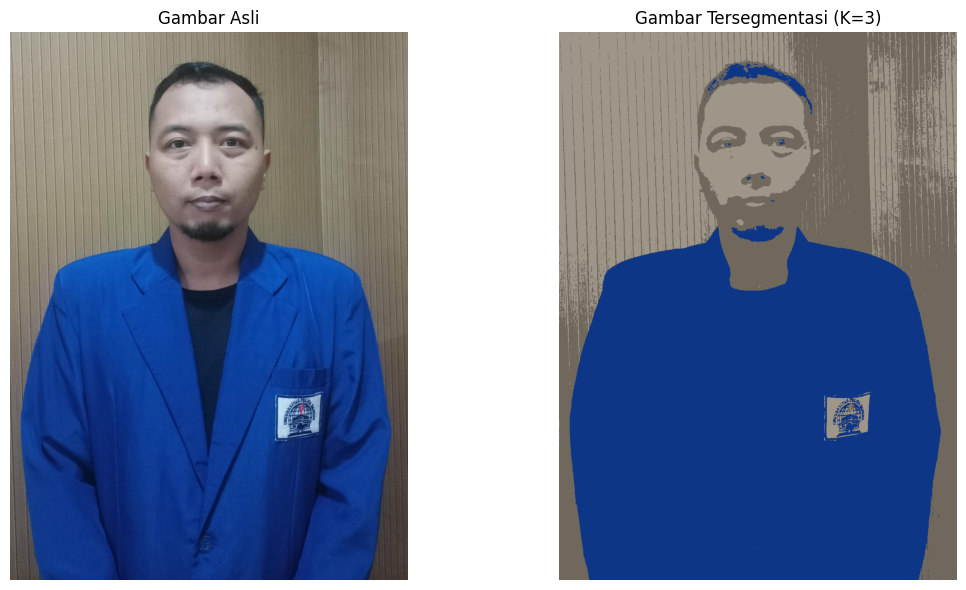

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Baca gambar
image = cv2.imread('images/satria.jpg')

# Konversi warna dari BGR ke RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')
plt.axis('off')

# Ubah gambar menjadi array 2D dengan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1, 3))

# Konversi tipe data ke float32
pixel_vals = np.float32(pixel_vals)

# Kriteria untuk algoritma k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Jumlah cluster
k = 3

# Lakukan k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi pusat cluster ke nilai 8-bit
centers = np.uint8(centers)

# Buat ulang data yang tersegmentasi dengan pusat cluster
segmented_data = centers[labels.flatten()]

# Bentuk ulang data tersegmentasi ke dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))

# Tampilkan gambar tersegmentasi
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Gambar Tersegmentasi (K=3)')
plt.axis('off')

# Tampilkan hasil
plt.tight_layout()
plt.show()
